<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/spectrum_carbon_monoxide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spectral Analysis of Diatomic Molecule Carbon Monoxide (CO)**

#### **Rotational Transitions for Diatomic Molecules Carbon Monoxide (CO)**

Rotational transitions occur when a molecule changes its rotational energy level. These transitions are typically observed in the **microwave** or **far-infrared** region of the electromagnetic spectrum.

For **diatomic molecules** (like $ \text{H}_2, \text{CO}, \text{O}_2 $, etc.), the rotational energy levels are quantized and given by the formula:

$
E_J = B J(J + 1)
$

Where:
- $ E_J $ is the rotational energy at quantum number $ J $
- $ B $ is the **rotational constant** (in units of energy).
- $ J $ is the **rotational quantum number** ($ J = 0, 1, 2, \dots $).

**Rotational Spectrum**

The selection rule for rotational transitions is $\Delta J = \pm 1 $, meaning that the molecule can only transition between adjacent rotational energy levels. The **frequency** of the transition between two levels $ J $ and $ J + 1 $ is given by:

$
\Delta E = h \nu = 2B(J + 1)
$

Where:
- $ \nu $ is the frequency of the rotational transition.
- $ B $ is again the rotational constant.



Text(0, 0.5, 'Intensity (a.u.)')

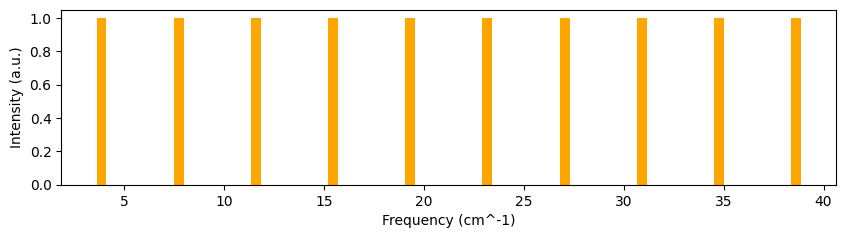

In [2]:
!pip install pyscf matplotlib -q
import numpy as np
import matplotlib.pyplot as plt

# Rotational Spectrum for a Diatomic Molecule carbon monoxide (CO), based on its rotational transitions

# Constants
B = 1.9313  # Rotational constant for CO in cm^-1 (this varies for different molecules)
# The code can be adapted for other molecules by simply adjusting the rotational constant B
J_max = 10  # Maximum rotational quantum number to consider

# Step 1: Calculate the energy levels for rotational transitions
def rotational_energies(B, J_max):
    energies = []
    for J in range(J_max + 1):
        energy = B * J * (J + 1)  # Rotational energy formula
        energies.append(energy)
    return np.array(energies)

# Step 2: Calculate the frequency of rotational transitions (ΔE = 2B(J+1))
def rotational_frequencies(B, J_max):
    frequencies = []
    for J in range(J_max):
        freq = 2 * B * (J + 1)  # Transition from J to J+1
        frequencies.append(freq)
    return np.array(frequencies)

# Step 3: Calculate the energies and frequencies
rot_energies = rotational_energies(B, J_max)
rot_frequencies = rotational_frequencies(B, J_max)

# Step 4: Plot the rotational spectrum (frequencies vs intensity)
plt.figure(figsize=(10, 5))

# Rotational spectrum as peaks (emission)
plt.subplot(2, 1, 1)
plt.bar(rot_frequencies, height=1.0, width=0.5, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')

* **Rotational Energy Levels**: We calculate the rotational energy levels $ E_J = B J(J + 1) $, where $B $ is the rotational constant for CO (in cm⁻¹).
* **Rotational Transition Frequencies**: Using the selection rule $ \Delta J = \pm 1 $, we calculate the frequency for each rotational transition as $ \nu = 2B(J + 1) $
* **Plotting the Rotational Spectrum**:
  * **Emission Spectrum**: A bar plot with peaks at each rotational frequency. Peaks correspond to rotational transitions where energy is emitted as the molecule transitions from a higher to a lower rotational state.
  * **Absorption Spectrum**: A plot showing dips at each rotational frequency, simulating absorption lines. Dips correspond to rotational transitions where energy is absorbed to excite the molecule from a lower to a higher rotational state.
*  **Frequencies**: The transition frequencies are printed in **cm⁻¹**
* **Rotational Constants for Other Molecules:**
  - **H₂**: B ≈ 60.8 cm⁻¹
  - **CO**: B ≈ 1.931 cm⁻¹
  - **O₂**: B ≈ 1.438 cm⁻¹
* **Application to Chemistry and Astrophysics:**
  * **Chemistry**: Rotational spectra are often used to determine the **bond lengths** and **moments of inertia** of molecules. Microwave spectroscopy is frequently used in gas-phase studies of molecules like CO, H₂, and others.
  * **Astrophysics**: In **interstellar molecular clouds**, molecules like CO, H₂O, and others exhibit rotational transitions in the **radio** or **microwave** regions. These rotational spectra provide information about the **temperature**, **density**, and **velocity** of interstellar gases.

#### **Emission and absorption spectra for Carbon Monoxide (HF-SCF)**

converged SCF energy = -112.749311329757


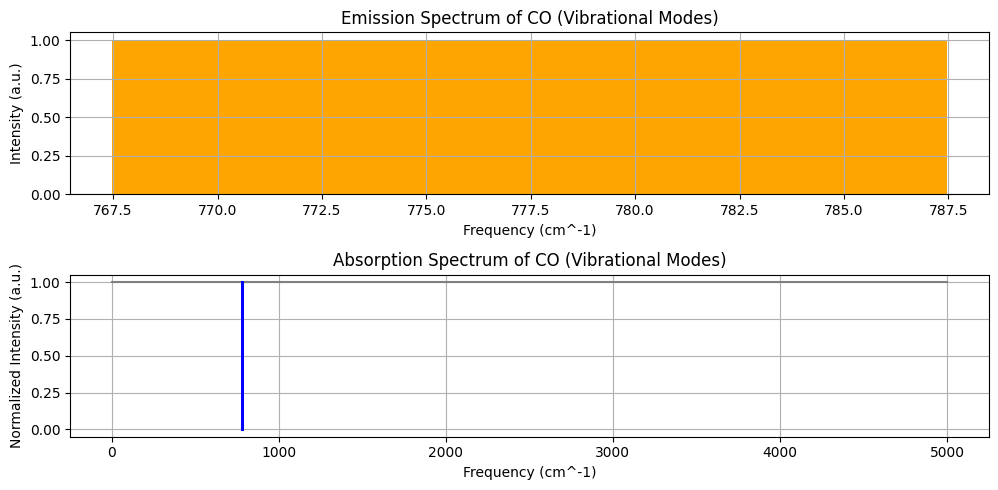

Vibrational frequencies (in cm^-1):
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1


In [3]:
!pip install pyscf matplotlib -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (CO in this case)
mol = gto.Mole()
mol.atom = '''
    C  0.000000  0.000000  0.000000
    O  0.000000  0.000000  1.128000
'''
mol.basis = 'cc-pVDZ'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Simulate and plot both emission and absorption spectra
# Emission Spectrum (peaks at specific frequencies)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # First plot: Emission Spectrum
plt.bar(frequencies, height=1.0, width=20.0, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Emission Spectrum of CO (Vibrational Modes)')
plt.grid(True)

# Absorption Spectrum (dips at specific frequencies)
plt.subplot(2, 1, 2)  # Second plot: Absorption Spectrum
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000), color='gray')  # Baseline at 1.0 intensity
for freq in frequencies:
    plt.plot([freq, freq], [1.0, 0.0], color='blue', lw=2)  # Draw vertical absorption dips
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Normalized Intensity (a.u.)')
plt.title('Absorption Spectrum of CO (Vibrational Modes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")

The fundamental vibrational frequency of Carbon Monoxide (CO) is experimentally known to be around 2143 cm⁻¹, which corresponds to the stretching mode of the C–O bond. This discrepancy between the result in this plot and the expected vibrational frequency can be addressed:
* Use a better basis set: Upgrade from sto-3g to a more accurate basis set such as cc-pVDZ or 6-31G(d), which can better describe molecular vibrations.
* Use a more accurate electronic structure method: Hartree-Fock often underestimates vibrational frequencies due to the lack of electron correlation. You can use DFT (with functionals like B3LYP) or post-Hartree-Fock methods (like MP2) for better accuracy.